## XGBoost Model and Feature Importance

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score

#### Load Processed Data

In [5]:
df_train = pd.read_csv(
    "Prototype/Data/train_combined.csv"
)
df_test = pd.read_csv("Prototype/Data/test_combined.csv")

In [6]:
y_train = df_train["isFraud"]
X_train = df_train.drop(columns=["isFraud"])
X_test = df_test.copy()

In [7]:
cat_cols = (
    ["ProductCD"]
    + ["card%d" % i for i in range(1, 7)]
    + ["addr1", "addr2", "P_emaildomain", "R_emaildomain"]
    + ["M%d" % i for i in range(1, 10)]
    + ["DeviceType", "DeviceInfo"]
    + ["id_%d" % i for i in range(12, 39)]
)


type_map = {c: str for c in cat_cols}
df_train[cat_cols] = df_train[cat_cols].astype(type_map, copy=False)
df_test[cat_cols] = df_test[cat_cols].astype(type_map, copy=False)

######################################################################################

id_cols = ["TransactionID", "TransactionDT"]
target = "isFraud"

numeric_cols = [
    "TransactionAmt",
    "dist1",
    "dist2",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
    "C11",
    "C12",
    "C13",
    "C14",
    "D1",
    "D2",
    "D3",
    "D4",
    "D5",
    "D6",
    "D7",
    "D8",
    "D9",
    "D10",
    "D11",
    "D12",
    "D13",
    "D14",
    "D15",
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33",
    "V34",
    "V35",
    "V36",
    "V37",
    "V38",
    "V39",
    "V40",
    "V41",
    "V42",
    "V43",
    "V44",
    "V45",
    "V46",
    "V47",
    "V48",
    "V49",
    "V50",
    "V51",
    "V52",
    "V53",
    "V54",
    "V55",
    "V56",
    "V57",
    "V58",
    "V59",
    "V60",
    "V61",
    "V62",
    "V63",
    "V64",
    "V65",
    "V66",
    "V67",
    "V68",
    "V69",
    "V70",
    "V71",
    "V72",
    "V73",
    "V74",
    "V75",
    "V76",
    "V77",
    "V78",
    "V79",
    "V80",
    "V81",
    "V82",
    "V83",
    "V84",
    "V85",
    "V86",
    "V87",
    "V88",
    "V89",
    "V90",
    "V91",
    "V92",
    "V93",
    "V94",
    "V95",
    "V96",
    "V97",
    "V98",
    "V99",
    "V100",
    "V101",
    "V102",
    "V103",
    "V104",
    "V105",
    "V106",
    "V107",
    "V108",
    "V109",
    "V110",
    "V111",
    "V112",
    "V113",
    "V114",
    "V115",
    "V116",
    "V117",
    "V118",
    "V119",
    "V120",
    "V121",
    "V122",
    "V123",
    "V124",
    "V125",
    "V126",
    "V127",
    "V128",
    "V129",
    "V130",
    "V131",
    "V132",
    "V133",
    "V134",
    "V135",
    "V136",
    "V137",
    "V138",
    "V139",
    "V140",
    "V141",
    "V142",
    "V143",
    "V144",
    "V145",
    "V146",
    "V147",
    "V148",
    "V149",
    "V150",
    "V151",
    "V152",
    "V153",
    "V154",
    "V155",
    "V156",
    "V157",
    "V158",
    "V159",
    "V160",
    "V161",
    "V162",
    "V163",
    "V164",
    "V165",
    "V166",
    "V167",
    "V168",
    "V169",
    "V170",
    "V171",
    "V172",
    "V173",
    "V174",
    "V175",
    "V176",
    "V177",
    "V178",
    "V179",
    "V180",
    "V181",
    "V182",
    "V183",
    "V184",
    "V185",
    "V186",
    "V187",
    "V188",
    "V189",
    "V190",
    "V191",
    "V192",
    "V193",
    "V194",
    "V195",
    "V196",
    "V197",
    "V198",
    "V199",
    "V200",
    "V201",
    "V202",
    "V203",
    "V204",
    "V205",
    "V206",
    "V207",
    "V208",
    "V209",
    "V210",
    "V211",
    "V212",
    "V213",
    "V214",
    "V215",
    "V216",
    "V217",
    "V218",
    "V219",
    "V220",
    "V221",
    "V222",
    "V223",
    "V224",
    "V225",
    "V226",
    "V227",
    "V228",
    "V229",
    "V230",
    "V231",
    "V232",
    "V233",
    "V234",
    "V235",
    "V236",
    "V237",
    "V238",
    "V239",
    "V240",
    "V241",
    "V242",
    "V243",
    "V244",
    "V245",
    "V246",
    "V247",
    "V248",
    "V249",
    "V250",
    "V251",
    "V252",
    "V253",
    "V254",
    "V255",
    "V256",
    "V257",
    "V258",
    "V259",
    "V260",
    "V261",
    "V262",
    "V263",
    "V264",
    "V265",
    "V266",
    "V267",
    "V268",
    "V269",
    "V270",
    "V271",
    "V272",
    "V273",
    "V274",
    "V275",
    "V276",
    "V277",
    "V278",
    "V279",
    "V280",
    "V281",
    "V282",
    "V283",
    "V284",
    "V285",
    "V286",
    "V287",
    "V288",
    "V289",
    "V290",
    "V291",
    "V292",
    "V293",
    "V294",
    "V295",
    "V296",
    "V297",
    "V298",
    "V299",
    "V300",
    "V301",
    "V302",
    "V303",
    "V304",
    "V305",
    "V306",
    "V307",
    "V308",
    "V309",
    "V310",
    "V311",
    "V312",
    "V313",
    "V314",
    "V315",
    "V316",
    "V317",
    "V318",
    "V319",
    "V320",
    "V321",
    "V322",
    "V323",
    "V324",
    "V325",
    "V326",
    "V327",
    "V328",
    "V329",
    "V330",
    "V331",
    "V332",
    "V333",
    "V334",
    "V335",
    "V336",
    "V337",
    "V338",
    "V339",
    "id_01",
    "id_02",
    "id_03",
    "id_04",
    "id_05",
    "id_06",
    "id_07",
    "id_08",
    "id_09",
    "id_10",
    "id_11",
]

In [8]:
for col in X_train.columns:
    if col in cat_cols:
        dff = pd.concat([X_train[col], X_test[col]])
        dff, _ = pd.factorize(dff, sort=True)
        if dff.max() > 32000:
            print(col, "needs int32 datatype")

        X_train[col] = dff[: len(X_train)].astype("int16")
        X_test[col] = dff[len(X_train) :].astype("int16")

In [9]:
cols = X_train.columns
for col in cols:
    if col not in cat_cols and col not in id_cols:
        dff = pd.concat([X_train[col], X_test[col]])
        dff = (dff - dff.min()) / (dff.max() - dff.min())
        dff.fillna(-1, inplace=True)

        X_train[col] = dff[: len(X_train)]
        X_test[col] = dff[len(X_train) :]

In [10]:
idx_train = X_train.index[: int(X_train.shape[0] * 0.75)]
idx_validation = X_train.index[int(X_train.shape[0] * 0.75) :]

x_train, y_train_set = X_train.iloc[idx_train], y_train.iloc[idx_train]
x_val, y_val = X_train.iloc[idx_validation], y_train.iloc[idx_validation]


print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(442905, 433)
(147635, 433)
(590540,)
(147635,)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# categorical_cols = [
#     "id_30",
#     "id_31",
#     "id_33",
#     "DeviceInfo",
#     "ProductCD",
#     "M4",
#     "id_12",
#     "id_15",
#     "id_34",
# ]

# for col in categorical_cols:
#     df_train[col] = df_train[col].astype(str)  
#     le = LabelEncoder()
#     df_train[col] = le.fit_transform(df_train[col])

In [ ]:
# y = df_train["isFraud"]
# X = df_train.drop(columns=["isFraud"])

#### Handle Class Imbalance

In [ ]:
# non_fraud_count, fraud_count = (y == 0).sum(), (y == 1).sum()

# scale_pos_weight = non_fraud_count / fraud_count
# print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 27.579586700866283


#### Train Test Split

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

#### Model Training

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

params = {
    "n_estimators": [1000, 2000],
    "max_depth": [3, 6, 12],
    "subsample": [0.4, 0.8],
}

clf = xgb.XGBClassifier(
    missing=-1,
    learning_rate=0.02,
    eval_metric="auc",
    tree_method="gpu_hist",
    colsample_bytree=0.4,
)


class TQDMRandomizedSearchCV(RandomizedSearchCV):
    def _run_search(self, evaluate_candidates):
        with tqdm(total=self.n_iter, desc="Hyperparameter Tuning Progress") as pbar:

            def wrapped_evaluate_candidates(params):
                results = evaluate_candidates(params)
                pbar.update(1)
                return results

            return super()._run_search(wrapped_evaluate_candidates)

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    scoring="roc_auc",
    verbose=1,
    cv=3,
    n_iter=6,
)

In [ ]:
model.fit(x_train, y_train_set)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  w

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=-1,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=6,
                   param_distributions={'max_depth': [3, 6, 12],
                                        'n_estimators': [1000, 2000],
                                        'subsample': [0.4, 0.8]},
                   scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'subsample': 0.8, 'n_estimators': 2000, 'max_depth': 6}

In [ ]:
from sklearn.metrics import roc_curve, auc

model = xgb.XGBClassifier(
    missing=-1,
    learning_rate=0.02,
    eval_metric="auc",
    tree_method="gpu_hist",
    colsample_bytree=0.4,
    max_depth=6,
    n_estimators=2000,
    subsample=0.8,
)
model.fit(X_train, y_train)
model.save_model("fraud_detection_model.json")

print("Model saved successfully as 'fraud_detection_model.json'")

c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:43:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  w

Model saved successfully as 'fraud_detection_model.json'


: 

In [ ]:
y_train_pred = model.predict(X_train)

train_fpr, train_tpr, thresholds = roc_curve(
    y_train, model.predict_proba(X_train)[:, 1]
)
test_fpr, test_tpr, thresholds = roc_curve(y_val, model.predict_proba(x_val)[:, 1])

print("Area under train roc {}".format(auc(train_fpr, train_tpr)))
print("Area under test roc {}".format(auc(test_fpr, test_tpr)))

c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = model.predict(x_val)

f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
geometric_mean = geometric_mean_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"f1: {f1}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"geometric_mean: {geometric_mean}")
print(f"conf_matrix: {conf_matrix}")

f1: 0.7213764079712836
recall: 0.5713725490196079
precision: 0.978180597515945
geometric_mean: 0.755719516052298
conf_matrix: [[142470     65]
 [  2186   2914]]


##### Description of Result:
F1-Score (0.71): Good balance between precision and recall, but can be improved. <br>
Recall (0.56): Model correctly detects 56% of fraud cases but misses 44% (false negatives). <br>
Precision (0.97): Very high precision, meaning most flagged fraud cases are correct with very few false alarms. <br>
Geometric Mean (0.75): Indicates a balanced performance despite class imbalance. <br>
Confusion Matrix:
- True Negatives (142,436): Correctly classified non-fraud cases.
- False Positives (99): Minimal false alarms.
- False Negatives (2,252): Missed fraud cases.
- True Positives (2,848): Correctly detected fraud transactions. <br>

Overall, the model is very precise in detecting fraud but misses many fraud cases (low recall). Improving recall through threshold tuning or class balancing techniques would enhance detection. 

#### Feature Importance

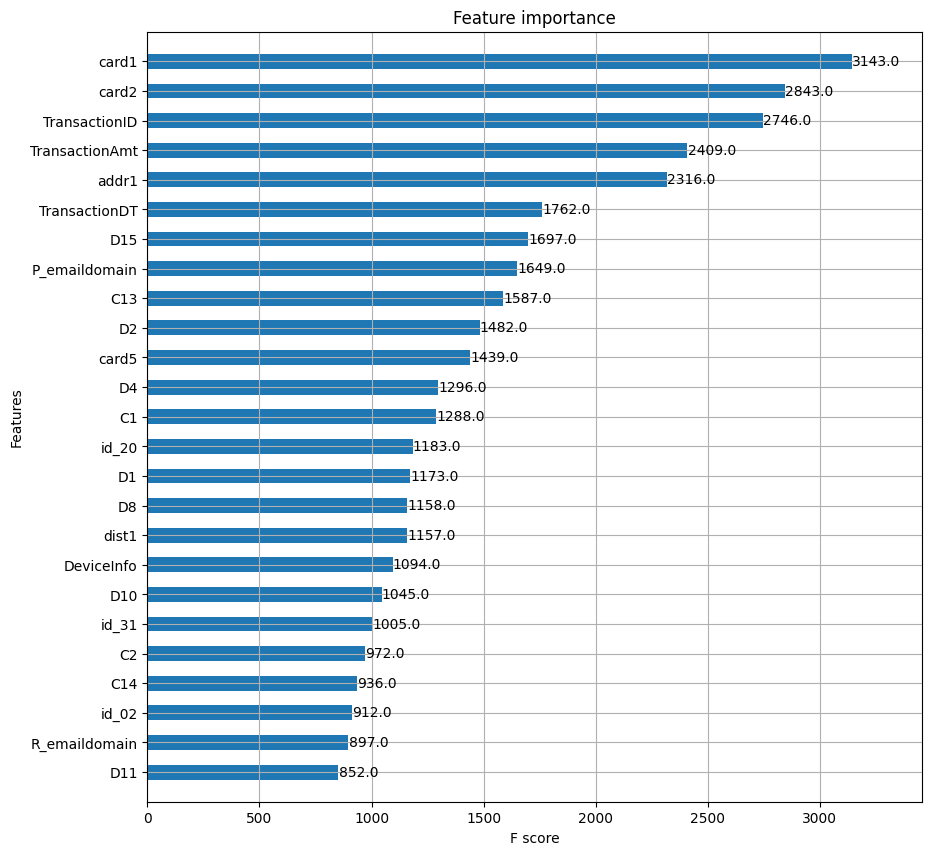

In [ ]:
from xgboost import plot_importance

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
plot_importance(model, max_num_features=25, height=0.5, ax=axes)
plt.show()